In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np

# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get number of samples and size of images
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

target = lfw_people.target

# Get Bush images
X_target = X[target==3]

# Normalize the data
u = np.mean(X_target, axis=0)
s = np.std(X_target, axis=0, ddof=1)
X_target_norm = (X_target-u)/s

# Number of PCA components to keep
n_components = 50

pca = PCA(n_components=n_components, svd_solver='full',
          whiten=False).fit(X_target_norm)

eigenfaces = pca.components_.reshape((n_components, h, w))

X_pca = pca.transform(X_target_norm)

W = pca.components_.T

X_approx = np.dot(X_pca, W.T)

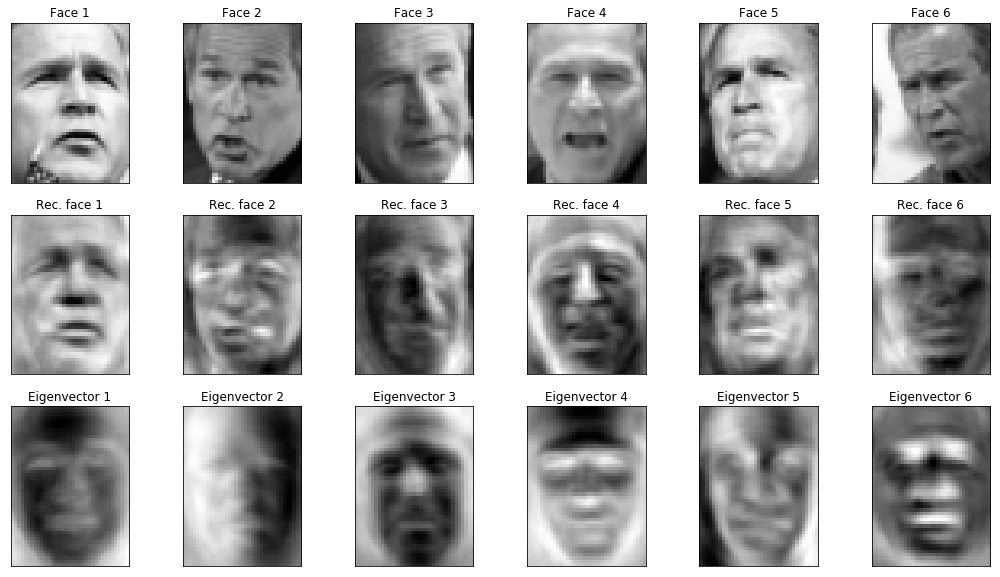

In [9]:
# Plot the data
plt.figure(figsize=[18, 10])
for i in range(6):
    ax = plt.subplot(3, 6, i+1)
    plt.imshow(X_target[i].reshape(h, w), 'gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.title('Face %d'%(i+1))
for i in range(6):
    ax = plt.subplot(3, 6, 7+i)
    plt.imshow(X_approx[i].reshape(h, w), 'gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)	
    plt.title('Rec. face %d'%(i+1))
for i in range(6):
    ax = plt.subplot(3, 6, 13+i)
    plt.imshow(eigenfaces[i], 'gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)	
    plt.title('Eigenvector %d'%(i+1))